# Bmi dataset

Python · 500 Person Gender-Height-Weight-Body Mass Index

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset

This data frame contains the following columns:

    Gender : Male / Female
    Height : Number (cm)
    Weight : Number (Kg)
    Index :
    0 - Extremely Weak
    1 - Weak
    2 - Normal
    3 - Overweight
    4 - Obesity
    5 - Extreme Obesity


In [70]:
df=pd.read_csv('./data/bmi.csv')
print(df.sample(frac=0.1)) # this will print only 10% of total data ie: 10%  of df

     Gender  Height  Weight  Index
442    Male     143     149      5
38   Female     171     152      5
377    Male     178     142      5
385  Female     197      72      2
217  Female     142      86      5
330  Female     164     160      5
233  Female     177      81      3
432  Female     150      97      5
337  Female     164     126      5
354    Male     190      50      0
226    Male     166      70      3
2    Female     185     110      4
290    Male     156      74      4
144    Male     140      79      5
256  Female     172     109      4
131  Female     187      70      2
446    Male     146      70      4
149  Female     168     115      3
216  Female     143     118      5
254    Male     183     147      5
25   Female     151      64      3
274    Male     178      83      3
127  Female     145      79      4
188  Female     161     134      5
176  Female     170     102      4
426    Male     188     141      4
425  Female     180      59      1
126    Male     194 

## Data Analysis & Transformation

In [71]:
df=pd.get_dummies(df)
print(df)

     Height  Weight  Index  Gender_Female  Gender_Male
0       174      96      4          False         True
1       189      87      2          False         True
2       185     110      4           True        False
3       195     104      3           True        False
4       149      61      3          False         True
..      ...     ...    ...            ...          ...
495     150     153      5           True        False
496     184     121      4           True        False
497     141     136      5           True        False
498     150      95      5          False         True
499     173     131      5          False         True

[500 rows x 5 columns]


In [72]:
# A new variable

df['bmi'] = df.apply(lambda row: row.Weight / (row.Height/100)**2, axis=1)

In [73]:
df.head()

,Height,Weight,Index,Gender_Female,Gender_Male,bmi
0,174,96,4,False,True,31.708284
1,189,87,2,False,True,24.355421
2,185,110,4,True,False,32.140248
3,195,104,3,True,False,27.350427
4,149,61,3,False,True,27.476240


In [74]:
# Data is reorganized
df = df[['Gender_Female', 'Gender_Male', 'Height', 'Weight', 'bmi', 'Index']]

In [75]:
df.head()

,Gender_Female,Gender_Male,Height,Weight,bmi,Index
0,False,True,174,96,31.708284,4
1,False,True,189,87,24.355421,2
2,True,False,185,110,32.140248,4
3,True,False,195,104,27.350427,3
4,False,True,149,61,27.476240,3


## Supervised Learning - Regression 

In [25]:
# Data seems to be ready, so you need to separate input data from prediction data 

# Input
X=df.iloc[:,[0,1,2,3]].values

# Output / Label
Y=df.iloc[:,5].values

array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Index'}>, <Axes: >]], dtype=object)

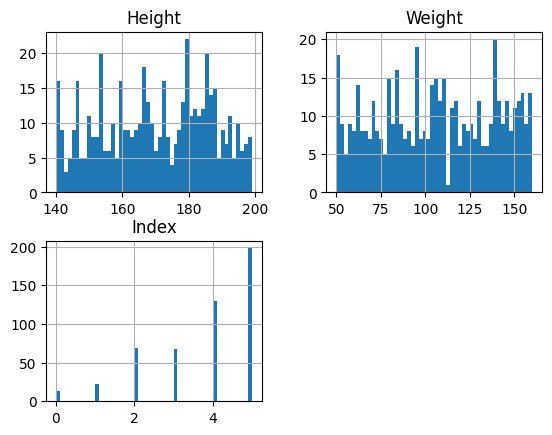

In [26]:
X_nu=df[["Height","Weight","Index"]]

X_nu.corr()

X_nu.hist(bins=50)

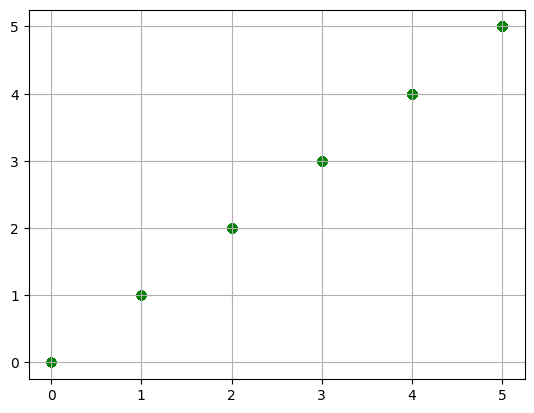

In [27]:
plt.scatter(X_nu.Index,Y,color="g")
plt.grid()

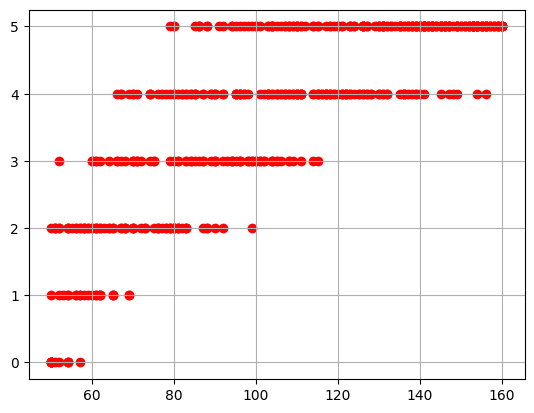

In [28]:
plt.scatter(X_nu.Weight,Y,color="r")
plt.grid()

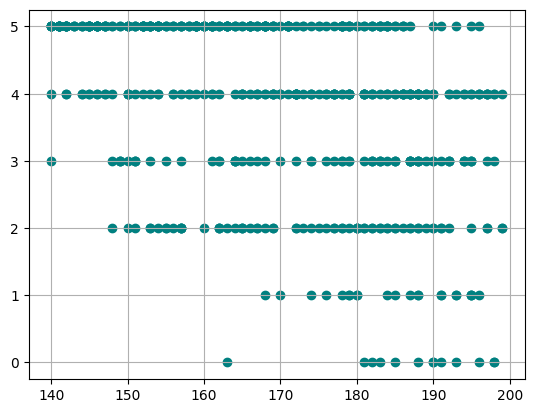

In [29]:
plt.scatter(X_nu.Height,Y,color="teal")
plt.grid()

In [30]:
# Splitting our dataset to train and test sets

X_train=X[:400]
X_test=X[400:]

Y_train=Y[:400]
Y_test=Y[400:]

In [31]:
# Fitting/Training to our model
from sklearn.linear_model import LinearRegression

teacher=LinearRegression()
learner=teacher.fit(X_train, Y_train)

In [41]:
# Making Prediction. X_test is unseen data

Yp=learner.predict(X_test)
c=learner.intercept_
m=learner.coef_
print("c is {}  \n m is {}  \n Yp is \n{}".format(c,m,Yp))

c is 6.211658282876174  
 m is [-0.04167476  0.04167476 -0.03533902  0.03361792]  
 Yp is 
[2.77513712 3.70145988 2.17488481 3.97900875 3.80323049 5.76328363
 1.96629289 5.22975606 5.14548968 4.77488836 1.81025107 3.3103858
 5.03412875 5.65755971 4.08440211 3.49224425 4.6308943  2.59660828
 4.89874023 1.96566918 1.32956675 6.2140854  4.50514079 3.47675427
 1.91971035 1.79241628 4.34972268 3.93191512 3.3516924  3.53274659
 2.53545264 5.58688166 4.13006778 4.19712308 2.50670489 5.62800772
 5.23429567 5.02896543 1.79476109 5.44724668 3.99134966 2.27573856
 6.20892207 5.79001711 3.90001831 5.34093645 3.44708967 4.01808314
 4.40589554 5.50902603 5.80642395 3.11728385 4.26545631 1.5025265
 2.35875752 2.62224437 3.82934026 2.77594137 3.53417455 4.60943676
 4.06265141 5.31936629 1.81025107 5.78595119 2.46305348 4.93924257
 2.85442071 5.90291862 4.42981052 2.92055914 5.83224057 4.57632993
 2.06480182 4.5057645  2.9241819  4.19023864 5.14812765 2.50326268
 2.6827763  4.57226401 4.55849514 3.7224

In [42]:
# List conversion due to data type

xlist=list(X_train)
ylist=list(Y_train)
yplist=list(Yp)

In [43]:
mytable=pd.DataFrame({"input":xlist,"out":ylist})
print(mytable)

                       input  out
0     [False, True, 174, 96]    4
1     [False, True, 189, 87]    2
2    [True, False, 185, 110]    4
3    [True, False, 195, 104]    3
4     [False, True, 149, 61]    3
..                       ...  ...
395   [True, False, 164, 71]    3
396   [False, True, 187, 96]    3
397  [False, True, 169, 136]    5
398   [True, False, 149, 61]    3
399  [False, True, 163, 137]    5

[400 rows x 2 columns]


In [44]:
from sklearn.metrics import mean_squared_error,accuracy_score

Error=mean_squared_error(Yp,Y_test)
np.sqrt(Error)



0.5791091027138878

<Axes: >

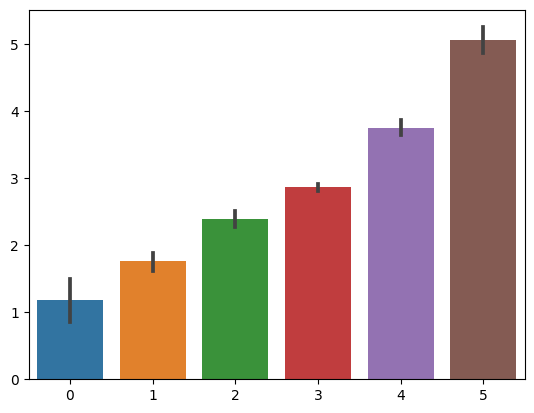

In [45]:
import seaborn as sns

sns.barplot(x=Y_test,y=Yp,data=df)


In [46]:
y_pred_cls=np.zeros_like(Yp)
y_pred_cls[Yp>2.5]=1

y_test_cls=np.zeros_like(Yp)
y_test_cls[Y_test>2.5]=1

In [47]:
print(accuracy_score(y_test_cls,y_pred_cls))

0.93


## More Visualization

In [80]:
df.head()

,Gender_Female,Gender_Male,Height,Weight,bmi,Index
0,False,True,174,96,31.708284,4
1,False,True,189,87,24.355421,2
2,True,False,185,110,32.140248,4
3,True,False,195,104,27.350427,3
4,False,True,149,61,27.476240,3


<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


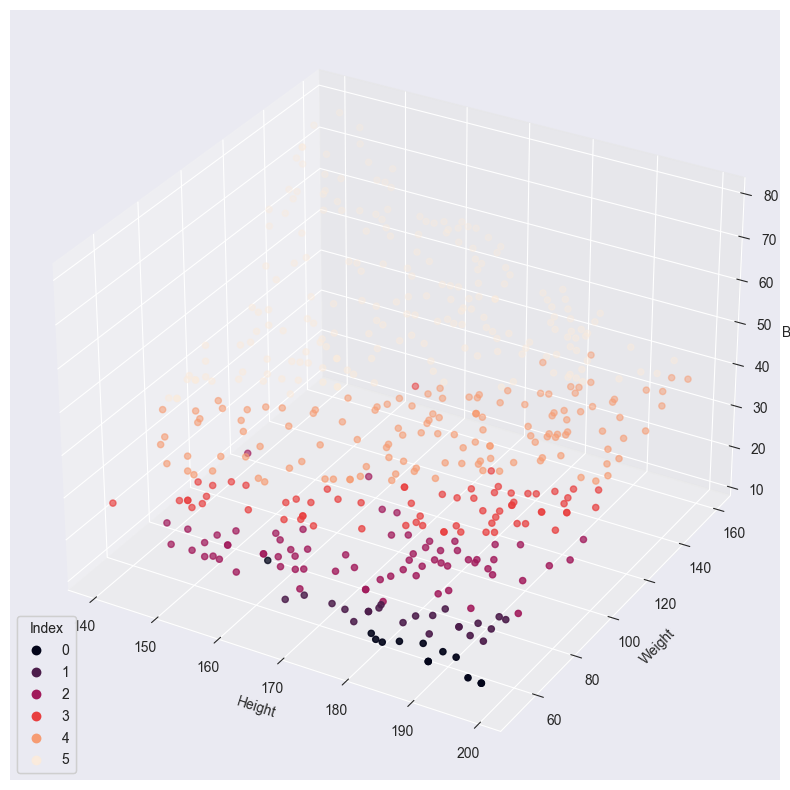

In [102]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

#df2 = df.where(df['Gender_Female'] == True)
df2 = df
sns.set_style("darkgrid")

x1 = df2['Height']
y1 = df2['Weight']
z1 = df2['bmi']

colors = df2['Index']

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
print(type(ax))

scatter = ax.scatter3D(x1, y1, z1, c=colors)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Index")
ax.add_artist(legend1)

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('BMI')

plt.show()

## My personal data!

In [55]:
my_height = 185
my_weight = 80
my_data = [[False, True, my_height, my_weight]]

my_output = learner.predict(my_data)
print("My index is \n{}".format(my_output))

bmi = (my_weight)/(my_height/100)**2
print("\nMy BMI is \n{}".format(bmi))


My index is 
[2.4050469]

My BMI is 
23.37472607742878
